# La física del modelo de Ising

En este notebook, investigaremos cuestiones de física que muestran el modelo de Ising.

## Escalamiento

Usa una versión eficiente del código del modelo de Ising para las siguientes tareas.

[1] Define la *energía por espín* $e := E/N$ y *magnetización por espín* $m := M/N$.

(i) Grafica $\langle e \rangle_T$ en función de la temperatura $T$, para distintos tamaños del sistema. 

(ii) Grafica $\langle |m| \rangle_T$ en función de la temperatura $T$, para distintos tamaños del sistema.

¿Qué observas? ¿A qué corresponde físicamente? ¿Cuál es el efecto de aumentar el tamaño del sistema?

Nótese que es común trabajar con tiempos en unidades de *un sweep*, definido como $N$ intentos por voltear un espín. Esto corresponde a un "tiempo físico", ya que da a cada espín la oportunidad de voltearse una vez (en promedio).

In [1]:
using PyPlot

INFO: Loading help data...


In [2]:
using Ising

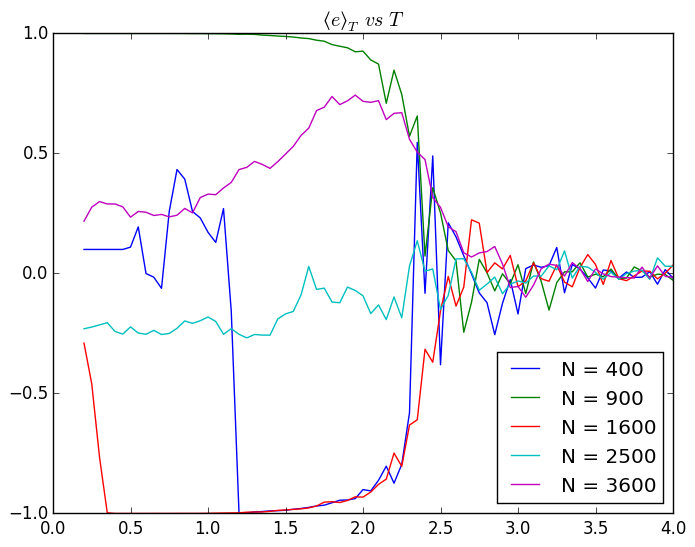

In [8]:
##Ponemos los valores iniciales
lados=[20,30,40,50,60]
Ns=[l^2 for l in lados]
confs=[Ising.configuracion(lados[i],lados[i]) for i in 1:length(lados)]

#Corremos la cadena de Markov para las energia por spin
for i in 1:length(lados)
    Ts,E_proms,M_proms=energia_magnetizacion_vs_temperatura(confs[i],int(1e5),[0.2:0.05:4.0])
    plot(Ts,M_proms/Ns[i],label="N = "*string(Ns[i]))
    legend(loc=4)
    title(L"⟨e⟩_T \ vs\  T")
end

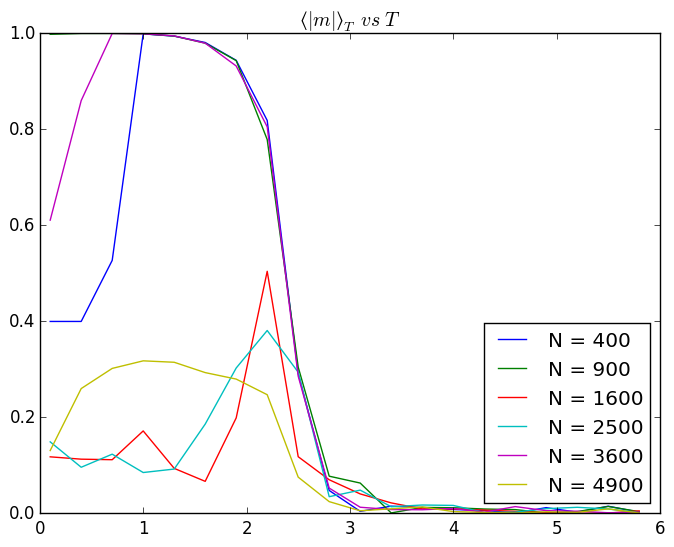

In [10]:
##Ponemos los valores iniciales
lados=[20,30,40,50,60,70]
Ns=[l^2 for l in lados]
confs=[configuracion(lados[i],lados[i]) for i in 1:length(lados)]

#Corremos la cadena de Markov para las magentizacion por spin
for i in 1:length(lados)
    Ts,E_proms,M_proms=energia_magnetizacion_vs_temperatura(confs[i],int(3e5))
    plot(Ts,abs(M_proms)/Ns[i],label="N = "*string(Ns[i]))
    legend(loc=4)
    title(L"⟨|m|⟩_T \ vs\  T")
end

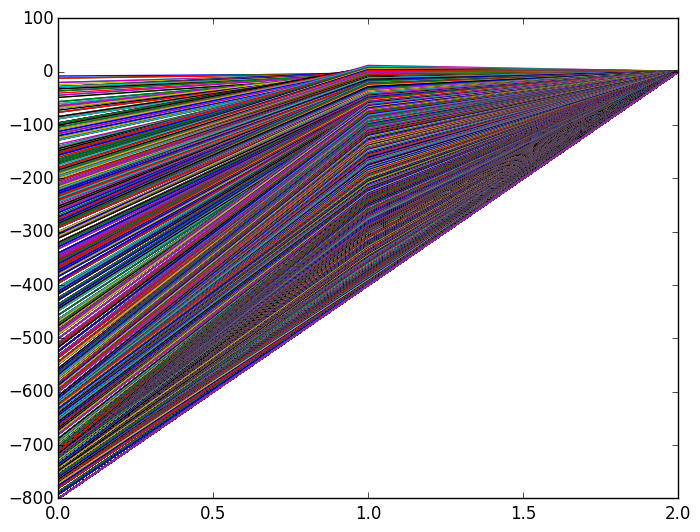

100000-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff88abdacf8>
 PyObject <matplotlib.lines.Line2D object at 0x7ff85dde50b8>
 PyObject <matplotlib.lines.Line2D object at 0x7ff85dde5390>
 PyObject <matplotlib.lines.Line2D object at 0x7ff85dde55f8>
 PyObject <matplotlib.lines.Line2D object at 0x7ff85dde5860>
 PyObject <matplotlib.lines.Line2D object at 0x7ff85dde5ac8>
 PyObject <matplotlib.lines.Line2D object at 0x7ff85dde5d30>
 PyObject <matplotlib.lines.Line2D object at 0x7ff88790dba8>
 PyObject <matplotlib.lines.Line2D object at 0x7ff85dde8240>
 PyObject <matplotlib.lines.Line2D object at 0x7ff85dde84a8>
 PyObject <matplotlib.lines.Line2D object at 0x7ff85dde8710>
 PyObject <matplotlib.lines.Line2D object at 0x7ff85dde8978>
 PyObject <matplotlib.lines.Line2D object at 0x7ff85dde8be0>
 ⋮                                                          
 PyObject <matplotlib.lines.Line2D object at 0x7ff84d4c9780>
 PyObject <matplotlib.lines.Line2D object at 0x7ff84d4ce

In [4]:
conf=configuracion(20,20)
plot( simulacion_con_E_y_M(conf, int(1e5)) )

Se puede ver que primero esta el perido de burnin del metodo montecarlo en el que no estamos en una configuracion en equilibrio pues pudimos haber mepezado lejos de una configuracion de equilibrio, Luego 

[2] La *capacidad calorífica* se define como

$$ C_T := \frac{\partial \langle E \rangle(T)}{\partial T}. $$

(i) Encuentra una fórmula para $C$ en términos de la función de partición $Z$.

(ii) Encuentra una fórmula para $C$ en términos de promedios de ensamble.

(i) Como $\langle E \rangle = \frac{\partial Z}{\partial E}$ entonces 
$$C_T = \frac{\partial²Z}{\partial T \partial E}$$

(ii) Como la varianza en promedio la podemos ver como $\langle E² \rangle - \langle E \rangle²$ podemos aproximar la derivada como $$ \frac{\langle E² \rangle - \langle E \rangle²}{T²} $$

[3] Calcula $c_T := C_T/N$ y dibújalo en función de $T$. ¿Qué observas?

## Ising con campo externo

La física cambia si le agregamos un *campo magnético externo* al modelo, es decir un campo magnético de magnitud $h$ que acopla a cada espín.

[4] Escribe un Hamiltoniano para la energía de una configuración $\pmb{\sigma}$.

[5] Haz una simulación del modelo para temperaturas $T$ más o menos bajas, cambiando el campo de positivo a negativo y de regreso. 

(i) ¿Qué se observa?

(ii) Si hay campo $h \neq 0$, ¿qué pasa al variar $T$? ¿Hay transición de fase?

(ii) Resume lo que has encontrado en un *diagrama de fases*: en el plano $(T, h)$, ¿dónde son las líneas que separan distintos tipos de comportamiento del sistema?

[6] Dibuja configuraciones para entender físicamente lo que está pasando.

## Modelo antiferromagnético

[7] ¿Qué pasa si los espines quieren estar *anti*-alineados con sus vecinos? ¿Qué pasa si $h \neq 0$ al variar $T$ -- hay transición de fase?

## Otras redes

Pensando en los materiales reales, éstos pueden tener distintas estructuras atómicas. Por lo tanto, es de interés estudiar el efecto de estudiar el mismo modelo de Ising en distintas redes.

[8] ¿Cómo podemos representar distintas redes en la computadora? Hazlo para la red cuadrada, la triangular y la cúbica simple, todas con condiciones periódicas de frontera. (En el caso de la triangular, encuentra una forma razonable para el sistema en el cual tiene sentido hablar de condiciones periódicas.)

[9] Extrae las partes de tu código que dependan de la red. Haz un tipo `Red` *abstracto* y subtipos de este tipo que son los distintos tipos de red: cuadrada, triangular, cúbica. El código se escribe como sigue:

```
abstract Red

type RedCuadrada <: Red
 ...
end
```

Para cada tipo de red, implementa funciones `vecinos` etc.

[10] Investiga las transiciones de fase que ocurren para las distintas redes, incluyendo los casos antiferromagnético y/o con campo.